In [249]:
import hoomd
import numpy as np

from monk import prep, render, pair

import matplotlib.pyplot as plt

In [200]:
# create random 2D packing
N = 100
L = prep.len_from_phi(N, 1.5, dim=2)
rng = np.random.default_rng()

snap = prep.uniform_random_snapshot(N, L, rng)

In [201]:
snap.particles.diameter

array([0.83333333, 1.16666667, 1.16666667, 1.16666667, 1.16666667,
       1.16666667, 0.83333333, 1.16666667, 1.16666667, 1.16666667,
       1.16666667, 1.16666667, 1.16666667, 0.83333333, 0.83333333,
       1.16666667, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 1.16666667, 0.83333333, 1.16666667, 1.16666667,
       1.16666667, 0.83333333, 0.83333333, 1.16666667, 0.83333333,
       1.16666667, 0.83333333, 0.83333333, 1.16666667, 0.83333333,
       1.16666667, 0.83333333, 0.83333333, 1.16666667, 1.16666667,
       0.83333333, 1.16666667, 1.16666667, 1.16666667, 0.83333333,
       0.83333333, 1.16666667, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 1.16666667, 0.83333333, 1.16666667, 0.83333333,
       1.16666667, 0.83333333, 1.16666667, 0.83333333, 1.16666667,
       1.16666667, 0.83333333, 1.16666667, 1.16666667, 0.83333333,
       0.83333333, 1.16666667, 0.83333333, 0.83333333, 1.16666667,
       1.16666667, 1.16666667, 0.83333333, 0.83333333, 0.83333

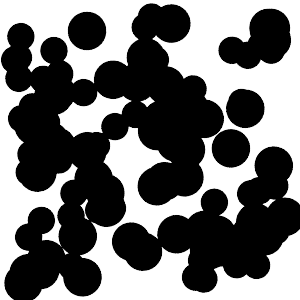

In [202]:
render.render_disk_frame(snap, Ly=1.1*L)

In [203]:
sim = hoomd.Simulation(device=hoomd.device.CPU())
sim.create_state_from_snapshot(snap)

tree = hoomd.md.nlist.Tree(0.3)
hertz = pair.bi_hertz(tree)

integrator = hoomd.md.Integrator(0.01)
integrator.forces.append(hertz)

nve = hoomd.md.methods.NVT(filter=hoomd.filter.All(), kT=1e-3, tau=1)
integrator.methods.append(nve)

sim.operations.integrator = integrator

sim.run(100000)

sim_prep = sim
snap_prep = sim.state.get_snapshot()

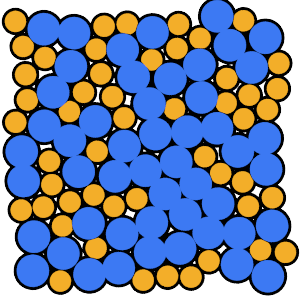

In [204]:
tsnap = sim.state.get_snapshot()
render.render_disk_frame(tsnap, Ly=1.1*L)

In [224]:
sim = hoomd.Simulation(device=hoomd.device.CPU())
sim.create_state_from_snapshot(snap_prep)

tree = hoomd.md.nlist.Tree(0.3)
hertz = pair.bi_hertz(tree)

integrator = hoomd.md.minimize.FIRE(0.01, 1e-6, 1.0, 1e-10 )
integrator.forces.append(hertz)

nve = hoomd.md.methods.NVE(filter=hoomd.filter.All())
integrator.methods.append(nve)

sim.operations.integrator = integrator

sim.run(100000)
integrator.converged

True

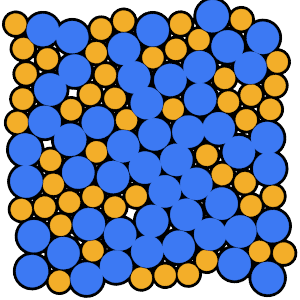

In [225]:
tsnap = sim.state.get_snapshot()
render.render_disk_frame(tsnap, Ly=1.1*L)

In [226]:
hertz.forces

array([[ 1.04308128e-06, -1.56462193e-07,  0.00000000e+00],
       [ 1.04308128e-07, -1.30385160e-07,  0.00000000e+00],
       [ 1.32620335e-06,  1.97440386e-06,  0.00000000e+00],
       [ 8.94069672e-08,  9.46223736e-07,  0.00000000e+00],
       [ 1.04308128e-07,  7.78585672e-07,  0.00000000e+00],
       [ 9.49949026e-07,  4.65661287e-07,  0.00000000e+00],
       [ 1.05425715e-06, -1.87195837e-06,  0.00000000e+00],
       [-3.55765224e-07,  2.49594450e-07,  0.00000000e+00],
       [-3.50177288e-07, -2.90572643e-07,  0.00000000e+00],
       [ 2.01165676e-07,  9.29459929e-07,  0.00000000e+00],
       [-2.98023224e-07,  1.25914812e-06,  0.00000000e+00],
       [ 3.42726707e-07,  1.41561031e-07,  0.00000000e+00],
       [-1.15111470e-06, -4.43309546e-07,  0.00000000e+00],
       [ 4.76837158e-07, -1.58324838e-07,  0.00000000e+00],
       [-4.32133675e-07,  2.60770321e-08,  0.00000000e+00],
       [-1.22189522e-06, -1.34110451e-07,  0.00000000e+00],
       [ 1.98002090e-06, -5.21540642e-08

In [221]:
sim.run(100000)

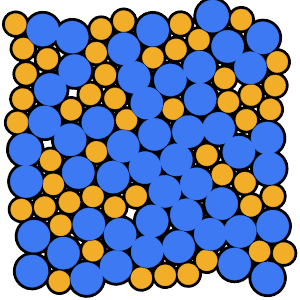

In [222]:
tsnap = sim.state.get_snapshot()
render.render_disk_frame(tsnap, Ly=1.1*L)

In [229]:
integrator.converged

True

In [231]:
mode_snap = sim.state.get_snapshot()

In [227]:
from schmeud import qlm

In [228]:
bi_hertz = qlm.BidispHertz()

qlm = qlm.QLM(bi_hertz)

In [232]:
evals, evecs = qlm.compute(mode_snap, filter=False)

In [259]:
plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"]

([6.0, 4.0], 72.0)

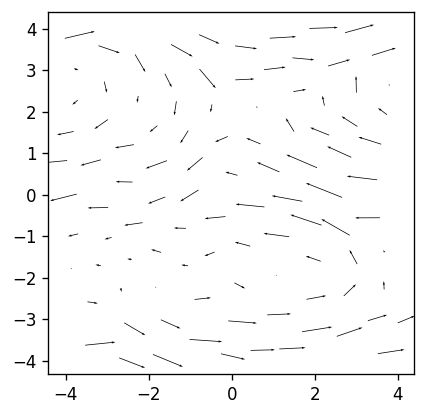

In [261]:
# plot arrows
fig, ax = plt.subplots(dpi=120)
ax.set_aspect('equal')

pos = mode_snap.particles.position[:, :2]

tvec = evecs[6].reshape((N, 2))
arrows = ax.quiver(pos[:, 0], pos[:, 1], tvec[:, 0], tvec[:, 1], scale=0.2, scale_units='xy', angles='xy', width=0.002)